In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math
import matplotlib.ticker as ticker

In [2]:
def read_total_size_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida20180517_10_caida20180816_0.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                full_path = os.path.join(path, dir, window_dir,'total_flow_size.txt')    
                with open(full_path, 'r') as f:
                    for val in f:
                        res.append(int(val))
            
    return res

# read_total_size_data()

## Prepare Dataset

In [3]:
## parameters

caida = ["caida-500w", "caida-250w", "caida-125w", "caida-50w"]
zipf2 = ["zipf2-250w", "zipf2-125w", "zipf2-50w"]
zipf1 = ["zipf1-250w", "zipf1-125w", "zipf1-50w"]


lens = [
        # ["5", "5"],
        ["6", "4"],
        # ["7", "3"],
        # ["8", "2"],
        ]

pcap_file = []
    
# # single dataset
pcap_file.append("caida-500w_10_.pcap")
pcap_file.append("caida-250w_10_.pcap")
pcap_file.append("caida-125w_10_.pcap")
pcap_file.append("caida-50w_10_.pcap")
pcap_file.append("zipf2-250w_10_.pcap") 
pcap_file.append("zipf2-125w_10_.pcap") 
pcap_file.append("zipf2-50w_10_.pcap") 
pcap_file.append("zipf1-250w_10_.pcap") 
pcap_file.append("zipf1-125w_10_.pcap") 
pcap_file.append("zipf1-50w_10_.pcap") 

### caida + zipf2 [10:22]
for a in caida:
    for b in zipf2:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + caida [22:34]
for a in zipf2:
    for b in caida:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### caida + zipf1 [34:46]
for a in caida:
    for b in zipf1:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + caida [46:58]
for a in zipf1:
    for b in caida:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + zipf1 [58:67]
for a in zipf2:
    for b in zipf1:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + zipf2 [67:76]
for a in zipf1:
    for b in zipf2:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### caida + caida [76:88]
for a in caida:
    for b in caida:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + zipf2 [88:94]
for a in zipf2:
    for b in zipf2:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + zipf1 [94:100]
for a in zipf1:
    for b in zipf1:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
print(pcap_file)    
print(f'Total Pcap File Number: {len(pcap_file)}')
# widths = [2048, 4096, 8192, 16384, 32768, 65536, 131072]
widths = [4096]
# widths = [1024]



['caida-500w_10_.pcap', 'caida-250w_10_.pcap', 'caida-125w_10_.pcap', 'caida-50w_10_.pcap', 'zipf2-250w_10_.pcap', 'zipf2-125w_10_.pcap', 'zipf2-50w_10_.pcap', 'zipf1-250w_10_.pcap', 'zipf1-125w_10_.pcap', 'zipf1-50w_10_.pcap', 'caida-500w_6_zipf2-250w_4.pcap', 'caida-500w_6_zipf2-125w_4.pcap', 'caida-500w_6_zipf2-50w_4.pcap', 'caida-250w_6_zipf2-250w_4.pcap', 'caida-250w_6_zipf2-125w_4.pcap', 'caida-250w_6_zipf2-50w_4.pcap', 'caida-125w_6_zipf2-250w_4.pcap', 'caida-125w_6_zipf2-125w_4.pcap', 'caida-125w_6_zipf2-50w_4.pcap', 'caida-50w_6_zipf2-250w_4.pcap', 'caida-50w_6_zipf2-125w_4.pcap', 'caida-50w_6_zipf2-50w_4.pcap', 'zipf2-250w_6_caida-500w_4.pcap', 'zipf2-250w_6_caida-250w_4.pcap', 'zipf2-250w_6_caida-125w_4.pcap', 'zipf2-250w_6_caida-50w_4.pcap', 'zipf2-125w_6_caida-500w_4.pcap', 'zipf2-125w_6_caida-250w_4.pcap', 'zipf2-125w_6_caida-125w_4.pcap', 'zipf2-125w_6_caida-50w_4.pcap', 'zipf2-50w_6_caida-500w_4.pcap', 'zipf2-50w_6_caida-250w_4.pcap', 'zipf2-50w_6_caida-125w_4.pcap', 'z

In [4]:
def plot_tfs_sum(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='zipf2a_3_caida20180517_7.pcap', window_size=200):
    
    labels = ["TFS Sum"]

    res = []
    # sum
    result = read_total_size_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, window_size)
    
    res.append(result)
       
    plt.figure(figsize=(12, 4))
    
    for i in range(len(res)):
        plt.plot(res[i], label=labels[i])
        

    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('Value')
    plt.title('%s Flow Size Summation (Window Size = %d)' % (dataset[:-5], window_size))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    

In [17]:
def plot_multi_tfs_sum(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['zipf2a_3_caida20180517_7.pcap'], window_size=200):
    
    labels = []
    res = []
    # sum
    max_val = -1
    for d in datasets:
        result = read_total_size_data(algo, row, width, level, seed, count, flowkey, epochs, d, window_size)
        
        max_val = max(max_val, result[-1])
        res.append(result)
        if d.split("_")[1] == "10":
            labels.append(d[:-9])
        else:
            labels.append(f'{d.split("_")[0]} -> {d.split("_")[2]}')
       
    plt.figure(figsize=(12, 4))
    
    for i in range(len(res)):
        if "->" not in labels[i]:
            plt.plot(res[i], label=labels[i], linewidth=2, linestyle='--')
        elif labels[i].split(' -> ')[0].split('-')[1] == labels[i].split(' -> ')[1].split('-')[1]:
            plt.plot(res[i], label=labels[i], linewidth=2, linestyle='--')
        else:
            plt.plot(res[i], label=labels[i], linewidth=2)

    # Set up ScalarFormatter
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-3, 3))  # Set the limits for using scientific notation

    # Set the formatter for the y-axis ticks
    plt.gca().yaxis.set_major_formatter(formatter)
    
    # Add labels and legend
    plt.xlabel('Time (sec)', fontsize=18)
    plt.ylabel('Total Flow Size', fontsize=18)
    plt.title('TFS Cumulative Count', fontsize=20)
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    # plt.ylim(top=max_val*1.2)
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks, size=16)
    plt.yticks(size=16)
    plt.legend(ncol=1, fontsize=16)
    plt.tight_layout()

    # Show the plot
    plt.show()
    

In [6]:
def plot_tfs_var(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='zipf2a_3_caida20180517_7.pcap', window_size=200):
    
    labels = ["TFS Var"]

    res = []
    # sum
    result = read_total_size_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, window_size)
    
    # res.append(result)
    
    # variation
    fin_res_var = [None]
    for i in range(1, len(result)):
        fin_res_var.append(result[i] - result[i-1])
        
    res.append(fin_res_var)
    
    # second variation
    # fin_sec_res_var = [None, None]
    # for i in range(2, len(result)):
    #     fin_sec_res_var.append(abs(fin_res_var[i] - fin_res_var[i-1]))
        
    # res.append(fin_sec_res_var)
    
    
    plt.figure(figsize=(12, 4))
    
    for i in range(len(res)):
        plt.plot(res[i], label=labels[i])
        

    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('Total Flow Size')
    plt.title('%s TFS Variation (Window Size = %d)' % (dataset[:-5], window_size))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    

In [27]:
def plot_multi_tfs_var(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['zipf2a_3_caida20180517_7.pcap'], window_size=200):
    
    labels = []

    res = []
    max_val = -1
    # sum
    for d in datasets:
        result = read_total_size_data(algo, row, width, level, seed, count, flowkey, epochs, d, window_size)
        
        fin_res_var = [None]
        for i in range(1, len(result)):
            fin_res_var.append(result[i] - result[i-1])
            
        max_val = max(max_val, max(fin_res_var[1:]))
            
        res.append(fin_res_var)
        if d.split("_")[1] == "10":
            labels.append(d[:-9])
        else:
            labels.append(f'{d.split("_")[0]} -> {d.split("_")[2]}')
    
    plt.figure(figsize=(12, 4))
    
    for i in range(len(res)):
        if "->" not in labels[i]:
            plt.plot(res[i], label=labels[i], linewidth=2)
            # plt.plot(res[i], label=labels[i], linewidth=2, linestyle='--')
        elif labels[i].split(' -> ')[0].split('-')[1] == labels[i].split(' -> ')[1].split('-')[1]:
            plt.plot(res[i], label=labels[i], linewidth=2, linestyle='--')
        else:
            plt.plot(res[i], label=labels[i], linewidth=2)
        # plt.plot(res[i], label=labels[i], linewidth=2)
 
    # Set up ScalarFormatter
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-3, 3))  # Set the limits for using scientific notation

    # Set the formatter for the y-axis ticks
    plt.gca().yaxis.set_major_formatter(formatter)

    # Add labels and legend
    plt.xlabel('Time (sec)', fontsize=18)
    plt.ylabel('Total Flow Size', fontsize=18)
    plt.title('TFS DIfference', fontsize=20)
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks, size=16)
    plt.yticks(size=16)
    plt.ylim(top=max_val*1.3)
    plt.legend(ncol=4, fontsize=16)
    # plt.legend(ncol=1, fontsize=16)
    plt.tight_layout()
    
    # # Place the legend outside the plot
    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fontsize=16)

    # # Adjust layout to make room for the legend
    # plt.tight_layout(rect=[0, 0, 1, 1])

    # Show the plot
    plt.show()
    

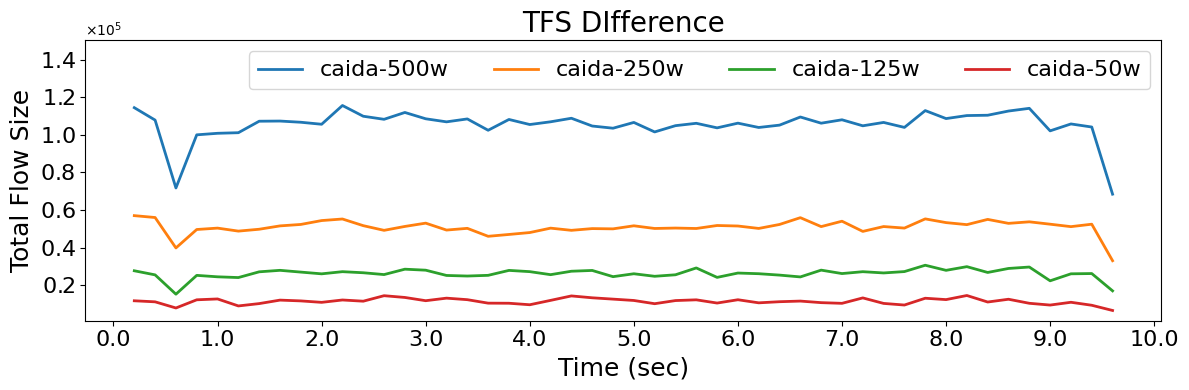

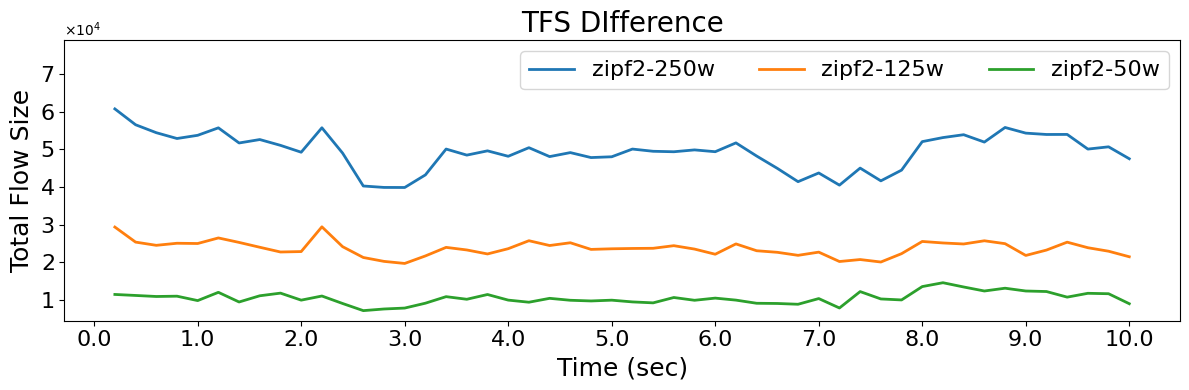

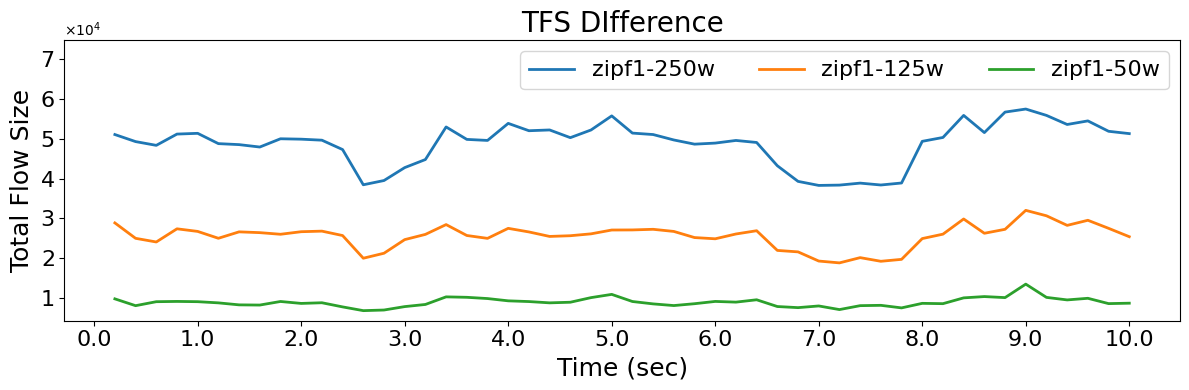

In [28]:
plot_multi_tfs_var(datasets=pcap_file[:4])
plot_multi_tfs_var(datasets=pcap_file[4:7])
plot_multi_tfs_var(datasets=pcap_file[7:10])

# for i in range(10, 22, 3):
#     plot_multi_tfs_var(datasets=pcap_file[i:i+3])
    
# for i in range(34, 46, 3):
#     plot_multi_tfs_var(datasets=pcap_file[i:i+3])

# for i in range(58, 67, 3):
#     plot_multi_tfs_var(datasets=pcap_file[i:i+3])
    
# for i in range(76, 88, 3):
#     plot_multi_tfs_var(datasets=pcap_file[i:i+3])
    
# for i in range(88, 94, 2):
#     plot_multi_tfs_var(datasets=pcap_file[i:i+2])

# for i in range(94, 100, 2):
#     plot_multi_tfs_var(datasets=pcap_file[i:i+2])

# plot_multi_tfs_var(datasets=pcap_file[4:5] + pcap_file[88:90])
# plot_multi_tfs_var(datasets=pcap_file[58:61])


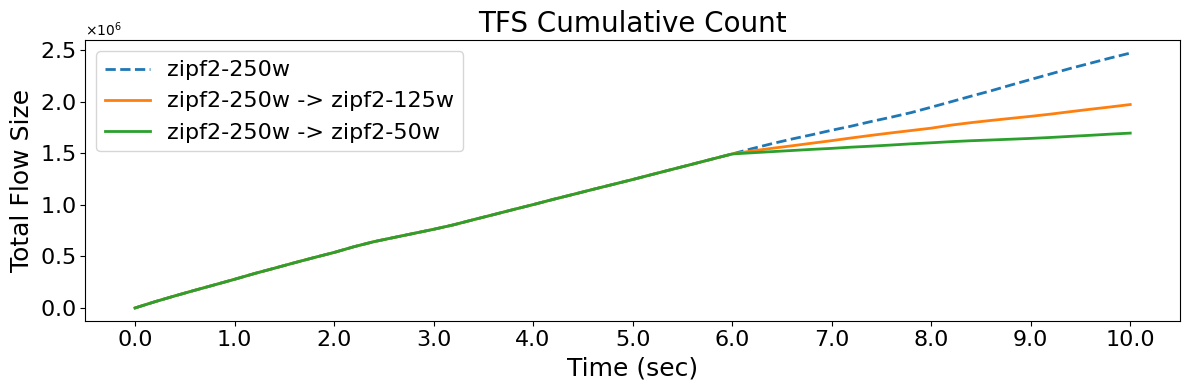

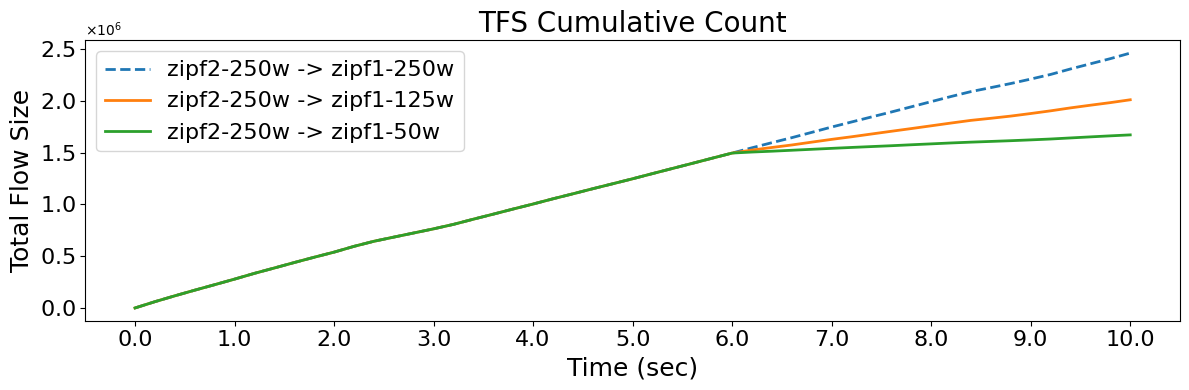

In [20]:
# plot_multi_tfs_sum(datasets=pcap_file[:4])
# plot_multi_tfs_sum(datasets=pcap_file[4:7])
# plot_multi_tfs_sum(datasets=pcap_file[7:10])

# for i in range(10, 22, 3):
#     plot_multi_tfs_sum(datasets=pcap_file[i:i+3])
    
# for i in range(34, 46, 3):
#     plot_multi_tfs_sum(datasets=pcap_file[i:i+3])

# for i in range(58, 67, 3):
#     plot_multi_tfs_sum(datasets=pcap_file[i:i+3])
    
# for i in range(76, 88, 3):
#     plot_multi_tfs_sum(datasets=pcap_file[i:i+3])
    
# for i in range(88, 94, 2):
#     plot_multi_tfs_sum(datasets=pcap_file[i:i+2])

# for i in range(94, 100, 2):
#     plot_multi_tfs_sum(datasets=pcap_file[i:i+2])

plot_multi_tfs_sum(datasets=pcap_file[4:5] + pcap_file[88:90])
plot_multi_tfs_sum(datasets=pcap_file[58:61])